In [1]:
import pandas as pd

In [2]:
preprocessed_dataset = pd.read_csv("preprocessed_placement.csv")

In [3]:
preprocessed_dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
preprocessed_dataset.isnull().sum()

ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [5]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
def plot_pdf_and_get_probability(column_data, start, end, traditional_way):
    # create distribution plot with enabled kernel density (to get curve) with blue color and histrogram in green color
    sns.distplot(column_data,kde=True, kde_kws={'color': 'blue'}, color='green')
    # Draw vertical line across axes in red color for start and end range
    plt.axvline(start, color='Red')
    plt.axvline(end, color='Red')

    # Calculate mean and standard deviation for a given column's data
    mean = column_data.mean()
    std = column_data.std()

    # Calculate normal distribution value
    dist = norm(mean, std)

    # Calculate range values using traditonal way
    if traditional_way == 'yes':
        print(" we are getting all the values from the range using traditional way ")
        values = []
        for value in range(start, end):
            values.append(value)
    else:
    # Calculate the same above work using list comprehension which iterate each value and store it in a list
       print("We are getting all the values from the range using list comprehension ")
       values = [value for value in range(start, end)]

    # Calualate probabilit density function of each values in the range (start and end) and sum all the pdf values
    probability_list = [dist.pdf(value) for value in values]
    probabilities = sum(probability_list)
    print (f"The range between ({start} , {end}) is: {probabilities}")
    probability_percentage = round(probabilities*100,1)
    # print all the values
    print("mean= %.3f, standard deviation= %.3f\n" %(mean,std))
    print(f"There are {probability_percentage} % of probablity to get marks between {start} and {end}")

    

/var/folders/52/3smrrwzs1674_yymbpt0326h0000gn/T/ipykernel_1539/4142046394.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column_data,kde=True, kde_kws={'color': 'blue'}, color='green')


 we are getting all the values from the range using traditional way 
The range between (60 , 70) is: 0.3449514151280293
mean= 67.303, standard deviation= 10.827

There are 34.5 % of probablity to get marks between 60 and 70


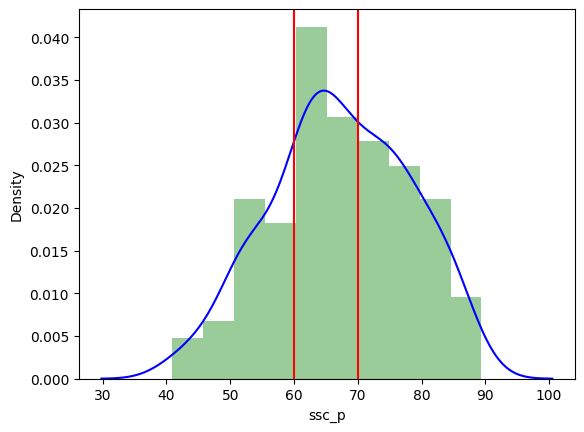

In [7]:
plot_pdf_and_get_probability(preprocessed_dataset['ssc_p'], 60,70, traditional_way='yes')

In [24]:
# Convert Normal Distrubtion to Standard Normal Distribution
def get_std_normal_distribution_graph(column_data):
    # get mean and standard deviation of column_data
    mean = column_data.mean()
    std = column_data.std()

    # get all the values from the column_data and store it in a list
    values = [i for i in column_data]

    # z score measures exactly how many standard deviations above or below the mean a data point 
    z_value = [(j-mean)/std for j in values]
    sns.distplot(z_value, kde=True, kde_kws={'color': 'blue'}, color='green')
    

/var/folders/52/3smrrwzs1674_yymbpt0326h0000gn/T/ipykernel_1539/999841425.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_value, kde=True, kde_kws={'color': 'blue'}, color='green')


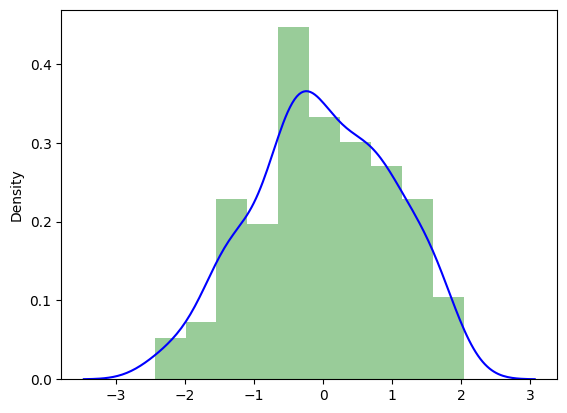

In [25]:
get_std_normal_distribution_graph(preprocessed_dataset['ssc_p'])